<a href="https://colab.research.google.com/github/arashHarirpoosh/FaceRecognition/blob/main/FrameCounter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import json

In [2]:
def numOfFramesInDir(addr):
    counter = 0
    for r, d, fi in os.walk(addr):
        counter += len(fi)
    return counter

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:

if __name__ == '__main__':

    base_addr = 'drive/MyDrive/Frames'
    frame_counts = {
        'unLabeled': 0,
        'labeled': 0
    }
    num_of_sources = len(os.listdir(base_addr))
    source_digits = len(str(num_of_sources))

    # selected_channels = [1]
    # selected_videos = [6]
    for root, dirs, files in os.walk(base_addr):
        root_list = root.split('/')

        # if root_list[-1] == 'unlabeled' and int(root_list[-2]) in selected_videos and \
        #         int(root_list[-3]) in selected_channels:
        if root_list[-1] == 'unlabeled':
            # print(root, dirs)
            for f in dirs:
                file_addr = os.path.join(root, f)
                # print(file_addr)
                frame_counts['unLabeled'] += len(os.listdir(file_addr))
        if root_list[-1] == 'labeled':
            vid_counted = False
            channel_num = root_list[-3]
            for f in dirs:
                file_addr = os.path.join(root, f)
                if f not in frame_counts.keys():
                    frame_counts[f] = {
                        'numOfFrames': 0,
                        'numOfVideos': 0,
                        'Channels': []
                    }

                # numOfFramesInDir(file_addr)
                num = numOfFramesInDir(file_addr)
                frame_counts[f]['numOfFrames'] += num
                frame_counts['labeled'] += num
                if not vid_counted:
                    frame_counts[f]['numOfVideos'] += 1
                if channel_num not in frame_counts[f]['Channels']:
                    frame_counts[f]['Channels'].append(channel_num)


    # print(frame_counts)
    print(json.dumps(frame_counts, indent=4, sort_keys=True))

{
    "Anderson_Cooper": {
        "Channels": [
            "001"
        ],
        "numOfFrames": 9430,
        "numOfVideos": 2
    },
    "Barack_Obama": {
        "Channels": [
            "001"
        ],
        "numOfFrames": 251,
        "numOfVideos": 1
    },
    "Chris_Cuomo": {
        "Channels": [
            "001"
        ],
        "numOfFrames": 191,
        "numOfVideos": 1
    },
    "Donald_Trump": {
        "Channels": [
            "001"
        ],
        "numOfFrames": 7925,
        "numOfVideos": 3
    },
    "Gavin_Newsom": {
        "Channels": [
            "001"
        ],
        "numOfFrames": 4778,
        "numOfVideos": 1
    },
    "Jeff_Bezos": {
        "Channels": [
            "001"
        ],
        "numOfFrames": 521,
        "numOfVideos": 2
    },
    "Joe_Biden": {
        "Channels": [
            "001"
        ],
        "numOfFrames": 1572,
        "numOfVideos": 2
    },
    "Van_Jones": {
        "Channels": [
            "001"
       

In [13]:
print(f'Number of detected identities: {len(frame_counts.keys()) - 2}')
labeled_img = frame_counts['labeled']
unlabeled_img = frame_counts['unLabeled']
print(f'Number of labeled imgs: {labeled_img} \nNumer of unlabeled imgs: {unlabeled_img}')

Number of detected identities: 8
Number of labeled imgs: 27040 
Numer of unlabeled imgs: 16819


In [14]:
import matplotlib.pyplot as plt
import numpy as np

<BarContainer object of 8 artists>

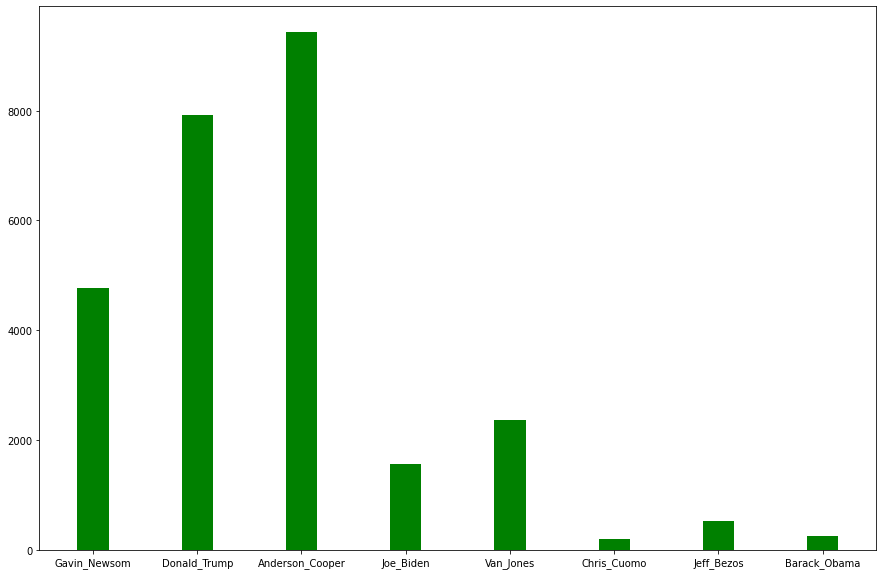

In [38]:
hist = {}
for k, v in frame_counts.items():
  if k not in ['labeled', 'unLabeled']:
    hist[k] = v['numOfFrames']
# plt.hist(hist)
# plt.show()
plt.figure(figsize=(15, 10))  
plt.bar(hist.keys(), hist.values(), color='g', align='center', width=0.3)